<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spam = pd.read_csv("/content/drive/MyDrive/brightcamp/python/Dataset/spam.csv")

In [4]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.shape

(5572, 2)

In [7]:
spam.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
spam.columns = spam.columns.str.strip()

In [10]:
spam.columns = spam.columns.str.lower()

In [11]:
spam.columns

Index(['category', 'message'], dtype='object')

In [12]:
spam.isna().sum()

,0
category,0
message,0


In [14]:
#check for duplicated
spam[spam.duplicated(subset=['category','message'], keep=False)]

,category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [15]:
spam.drop_duplicates(subset=['category','message'], inplace=True)

In [16]:
spam.shape

(5157, 2)

In [17]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   object
 1   message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [18]:
spam['category'].value_counts()

,count
category,
ham,4516
spam,641


In [19]:
spam.loc[spam['category'] == 'spam', 'category'] = 1
spam.loc[spam['category'] == 'ham', 'category'] = 0

In [20]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   object
 1   message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [21]:
spam['category'] = spam['category'].astype(int)

In [22]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   int64 
 1   message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


<Axes: xlabel='category', ylabel='count'>

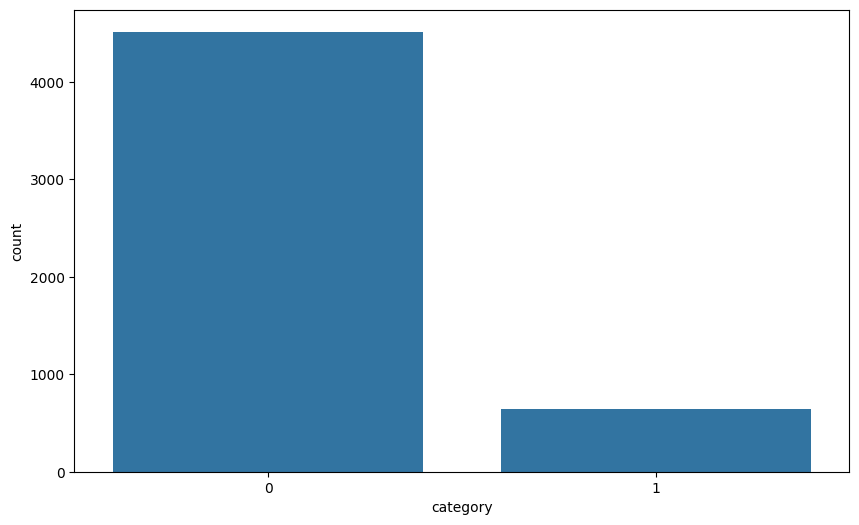

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x=spam['category'])

In [24]:
x = spam['message']   #feature
y = spam['category']  #target

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
